In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('phienus_ferb.jpeg')

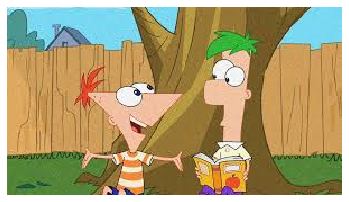

In [2]:
# img = img[:,250:650,:]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
img.shape

(168, 299, 3)

In [4]:
X = img.reshape((-1,3))
print(X.shape)

(50232, 3)


In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
centers = km.cluster_centers_

In [7]:
print(centers)

[[126.3413233  212.28110143 235.88470681]
 [203.47874732 155.59662741  88.3641863 ]
 [128.78072097  99.28473744  44.27862976]
 [240.52072037 206.69481022 179.87664601]
 [ 77.64234507 129.46423451  71.20344113]]


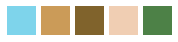

In [8]:
import numpy as np
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)

    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
    
plt.show()
    

In [9]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([ 5048, 18681, 15067,  5161,  6275]))

In [10]:
# Repaint the Original Image
labels = km.labels_

In [11]:
new_img  = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]

print(new_img.shape)

(50232, 3)


In [12]:
new_img = new_img.reshape(img.shape)

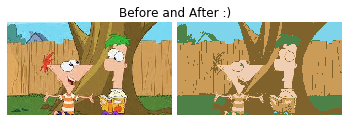

In [13]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((168,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()